In [1]:
# %%
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import config_context
import utils 
import torch
import models
from torch import nn
from torch.nn import functional as F
from torchsummary import summary
from einops import rearrange, reduce, repeat
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
import argparse
import matplotlib as mpl



In [2]:
# %%
subj = utils.ExpInfo.getSubjIDs()[0]
task = utils.ExpInfo.taskName[0]
model = utils.Model.load(subj=subj)

In [53]:
nTime = 50
nBatch = 3
nHidden = model.model.nhidden
iNeuron = 11
x = np.zeros((nBatch, nHidden))
x[:, iNeuron] = np.linspace(-0.9, 0.9, nBatch)
xy_init = torch.tensor([0.002, -0.002])
xy_init = repeat(xy_init, 'f -> b f', b=nBatch)
# x = repeat(x, axis=1)
x = torch.from_numpy(x)
y = model.model.decoding(x, xy_init, nTime)
y = y.detach().cpu().numpy()
y = y.cumsum(axis=0)


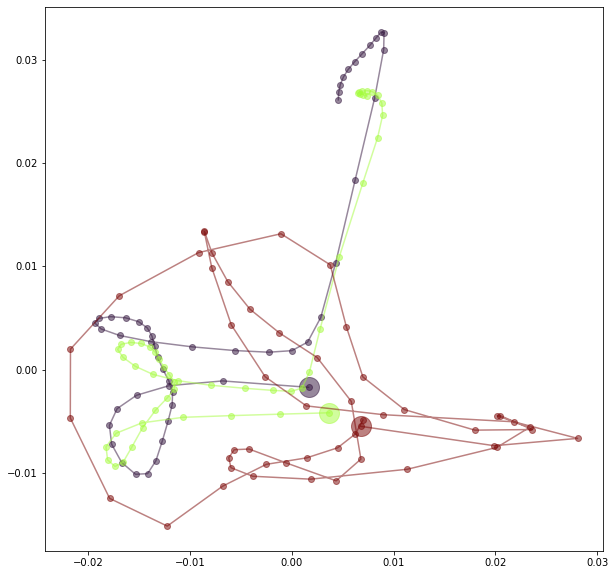

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colormap = mpl.cm.get_cmap('turbo')
colors = colormap(np.linspace(0, 1, nBatch))
# for i in range(nBatch):
#     ax.plot(y[i, :, 0], y[i, :, 1], '-')
# ax.plot()
# y = rearrange(y, 'b t f -> t b f')
# y = y.cumsum(axis=0)
for i in range(nBatch):
    ax.plot(y[i, :, 0], y[i, :, 1], '-o', color=colors[i], alpha=0.5)
    ax.plot(y[i, 0, 0], y[i, 0, 1], 'o', color=colors[i], alpha=0.5, markersize=20)
# ax.plot(y[:, :, 0], y[:, :, 1], '-', c=colors)